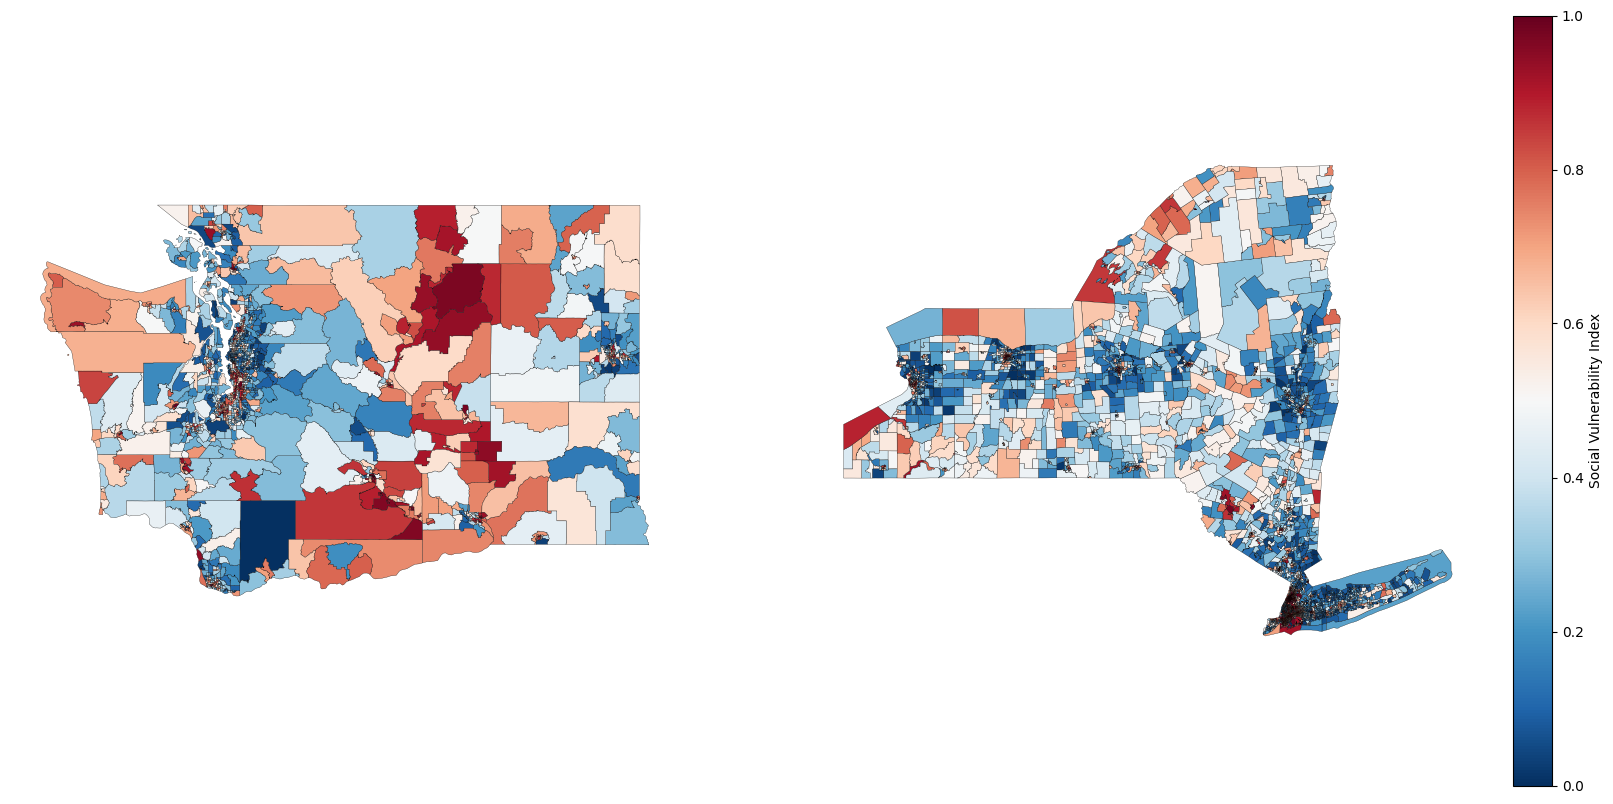

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Paths for first dataset
tessellation_path1 = 'tessellation_WA.geojson'
svi_path1 = 'demographics_WA.csv'

# Paths for second dataset
tessellation_path2 = 'tessellation_NY.geojson'
svi_path2 = 'demographics_NY.csv'

# Load the first dataset
census_tracts1 = gpd.read_file(tessellation_path1)
svi_data1 = pd.read_csv(svi_path1)
svi_data1['GEOID'] = svi_data1['geoid'].astype(str)
census_tracts1['GEOID'] = census_tracts1['GEOID'].astype(str)
merged_data1 = census_tracts1.merge(svi_data1, on='GEOID')

# Load the second dataset
census_tracts2 = gpd.read_file(tessellation_path2)
svi_data2 = pd.read_csv(svi_path2)
svi_data2['GEOID'] = svi_data2['geoid'].astype(str)
census_tracts2['GEOID'] = census_tracts2['GEOID'].astype(str)
merged_data2 = census_tracts2.merge(svi_data2, on='GEOID')

# Plot both maps side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first map
merged_data1.plot(
    column='svi',
    cmap='RdBu_r',  # colormap
    legend=False,  # Single legend for both
    vmin=0,
    vmax=1,
    ax=axes[0],
    edgecolor='black',
    linewidth=0.2
)
axes[0].axis('off')

# Plot the second map
merged_data2.plot(
    column='svi',
    cmap='RdBu_r',  # Same colormap
    legend=False,  # Single legend for both
    vmin=0,
    vmax=1,
    ax=axes[1],
    edgecolor='black',
    linewidth=0.2
)
axes[1].axis('off')

# Add a single shared legend on the side
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=0, vmax=1)),
                    ax=axes, orientation='vertical', fraction=0.03, pad=0.02)
cbar.set_label("Social Vulnerability Index")

# Save and show the plot
plt.savefig('svi_dual_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


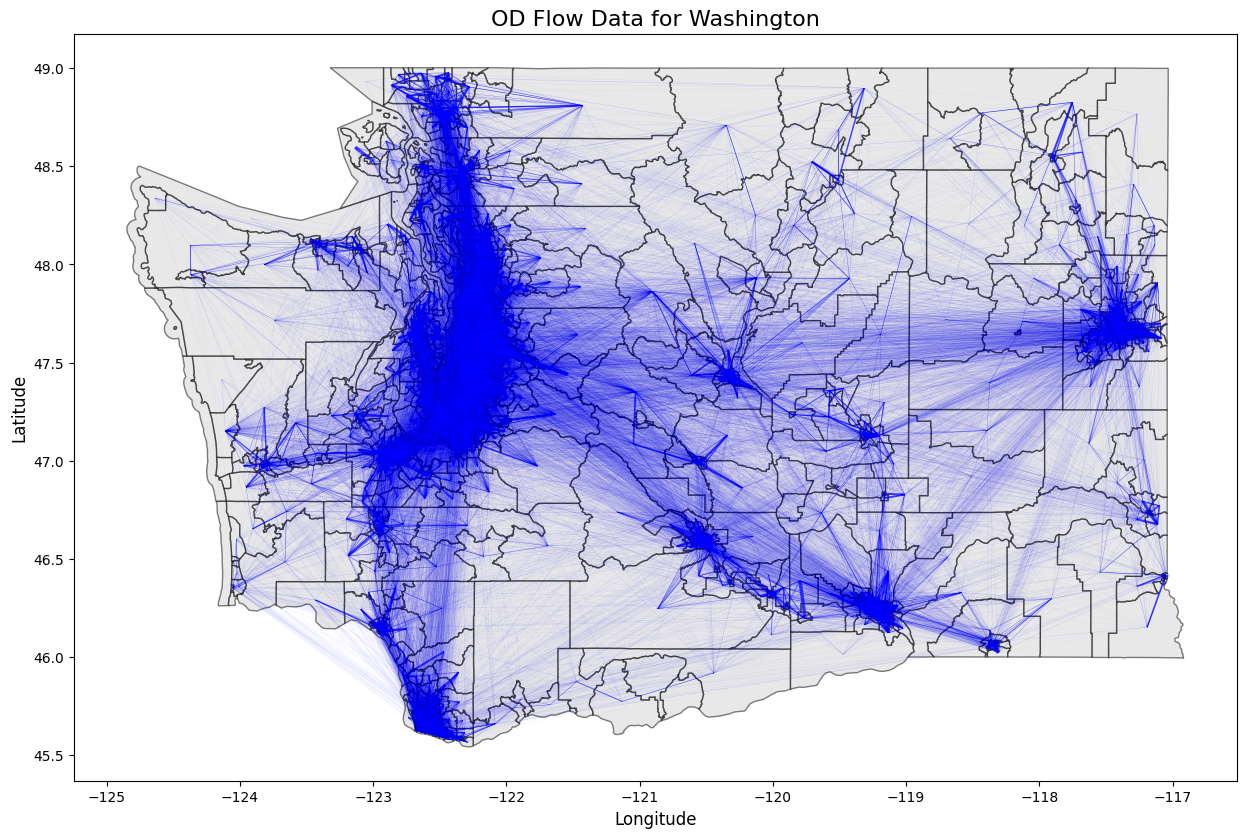

In [ ]:
geojson_path = 'tessellation_WA.geojson'
tessellation = gpd.read_file(geojson_path)
flow_csv_path = 'flow_WA.csv'

flow_data = pd.read_csv(flow_csv_path)

# Ensure GeoID columns are strings
flow_data['geoid_o'] = flow_data['geoid_o'].astype(str)
flow_data['geoid_d'] = flow_data['geoid_d'].astype(str)
tessellation['GEOID'] = tessellation['GEOID'].astype(str)

# Merge flow data with tessellation geometries for origins and destinations
origin_geom = tessellation[['GEOID', 'geometry']].rename(columns={'geometry': 'origin_geometry'})
destination_geom = tessellation[['GEOID', 'geometry']].rename(columns={'geometry': 'destination_geometry'})

# Join origin and destination geometries
flow_data = flow_data.merge(origin_geom, left_on='geoid_o', right_on='GEOID', how='left')
flow_data = flow_data.merge(destination_geom, left_on='geoid_d', right_on='GEOID', how='left')

flows_gdf = gpd.GeoDataFrame(
    flow_data,
    geometry='flow_line',
    crs=tessellation.crs
).dropna(subset=['flow_line'])

# Plot the flow map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
tessellation.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# Plot flow lines with weights based on 'pop_flows'
flows_gdf.plot(
    ax=ax,
    color='blue',
    linewidth=flows_gdf['pop_flows'] / flows_gdf['pop_flows'].max() * 5,  # Normalize line width
    alpha=0.7
)

# Add title and labels
plt.title("OD Flow Data for Washington", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()